## Import Libraries and Data Input<a id='2'></a>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
nifty_50_df = pd.read_csv("archive/NIFTY 50.csv", index_col='Date', parse_dates=['Date'])
nifty_bank_df = pd.read_csv("archive/NIFTY BANK.csv", index_col='Date', parse_dates=['Date'])

nifty_50_df.head(5)

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322,8.841500e+09,25.91,4.63,0.95
2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872,1.973690e+10,26.67,4.76,0.92
2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431,3.084790e+10,25.97,4.64,0.95
2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875,2.531180e+10,26.32,4.70,0.94
2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945,1.914630e+10,26.25,4.69,0.94


In [3]:
nifty_50_df.tail(5)

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2021-07-01,15755.05,15755.55,15667.05,15680.00,224921644,1.735997e+11,28.26,4.23,1.27
2021-07-02,15705.85,15738.35,15635.95,15722.20,254808999,1.801542e+11,28.33,4.24,1.23
2021-07-05,15793.40,15845.95,15762.05,15834.35,207032153,1.497654e+11,28.53,4.27,1.23
2021-07-06,15813.75,15914.20,15801.00,15818.25,391410742,2.445605e+11,28.50,4.26,1.10
2021-07-07,15819.60,15893.55,15779.70,15879.65,329308646,2.225996e+11,28.62,4.28,1.10


## Data Cleaning<a id='3'></a>

In [4]:
nifty_50_df = nifty_50_df.fillna(method='ffill')
nifty_bank_df = nifty_bank_df.fillna(method='ffill')

## Visualizing the datasets<a id='4'></a>

In [5]:
def plot_attribute(df, attritube ,start='2000', end='2020',color ='blue'):
    fig, ax = plt.subplots(1, figsize=(20,5))
    ax.plot(df[start:end].index, df[start:end][attritube],'tab:{}'.format(color))
    ax.set_title("Nifty stock {} from 2000 to 2020".format(attritube))
    
    ax.axhline(y=df[start:end].describe()[attritube]["max"],linewidth=2, color='m')
    ax.axhline(y=df[start:end].describe()[attritube]["min"],linewidth=2, color='c')
    ax.axvline(x=df[attritube].idxmax(),linewidth=2, color='b')
    ax.axvline(x=df[attritube].idxmin() ,linewidth=2, color='y')
    
    ax.text(x=df[attritube].idxmax(),
            y=df[start:end].describe()[attritube]["max"],
            s='MAX',
            horizontalalignment='right',
            verticalalignment='bottom',
            color='blue',
            fontsize=20)
    
    ax.text(x=df[attritube].idxmin(),
            y=df[start:end].describe()[attritube]["min"],
            s='MIN',
            horizontalalignment='left',
            verticalalignment='top',
            color='red',
            fontsize=20)
    
    plt.show()
    print("Max Value :  ",df[start:end].describe()[attritube]["max"])
    print("Min Value :  ",df[start:end].describe()[attritube]["min"])


### Nifty 50 Close Price Visulization<a id='5'></a>

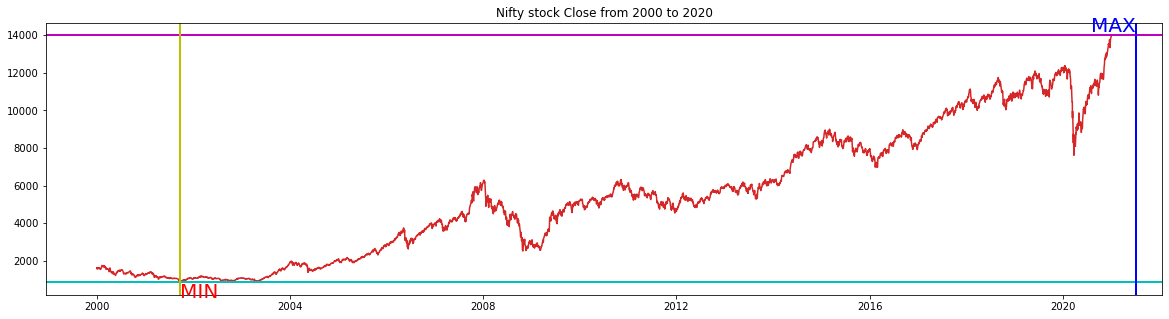

Max Value :   13981.95
Min Value :   854.2


In [6]:
plot_attribute(nifty_50_df,"Close",color='red')

### Nifty BANK Close Price Visulization<a id='6'></a>

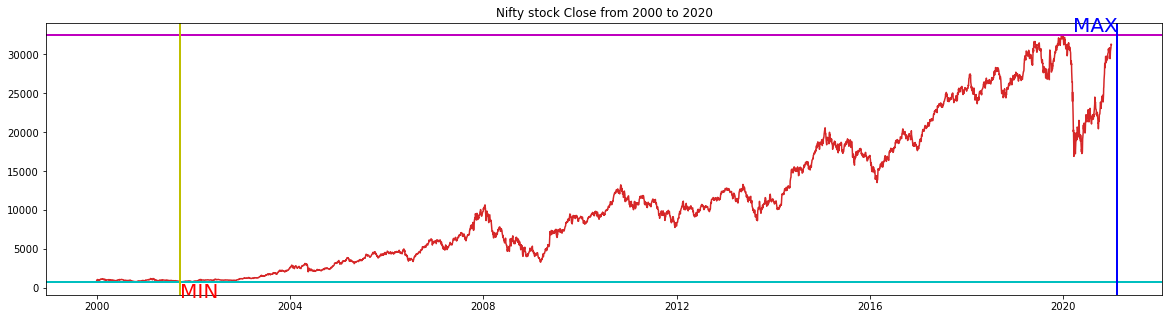

Max Value :   32443.85
Min Value :   743.7


In [7]:
plot_attribute(nifty_bank_df,"Close",color='red')

## Comparing time series<a id='7'></a>


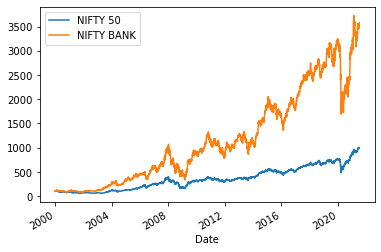

In [8]:
normalised_nifty_50_df = nifty_50_df["Close"].div(nifty_50_df["Close"].iloc[0]).mul(100)
normalised_nifty_bank_df = nifty_bank_df["Close"].div(nifty_bank_df['Close'].iloc[0]).mul(100)
normalised_nifty_50_df.plot()
normalised_nifty_bank_df.plot()
plt.legend(['NIFTY 50','NIFTY BANK'])
plt.show()

In [9]:
dicky_fuller_result = adfuller(nifty_50_df['Close'])
dicky_fuller_result

(0.9959169554366388,
 0.994222680329063,
 18,
 5334,
 {'1%': -3.4315765560130287,
  '5%': -2.8620820125952537,
  '10%': -2.567058512677479},
 61438.08456269483)

### Difference Δyt = yt − yt−1<a id='10'></a>

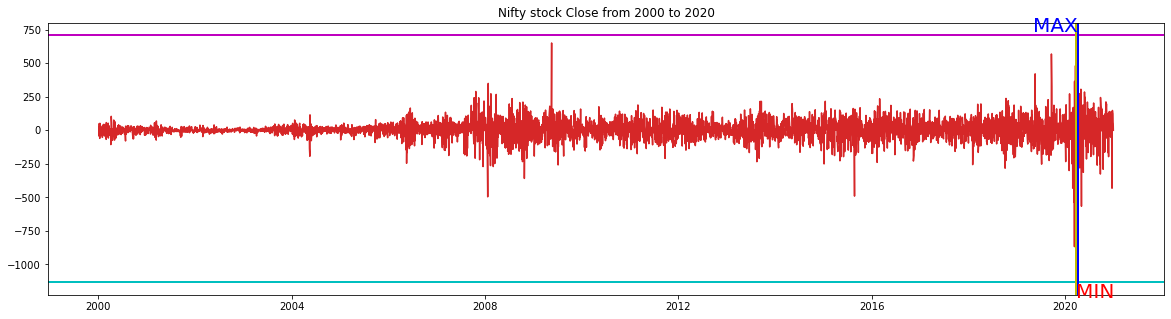

Max Value :   708.4000000000005
Min Value :   -1135.2000000000007


In [10]:
plot_attribute(nifty_50_df.diff(),"Close",color='red')

### proportional change <a id='11'></a>

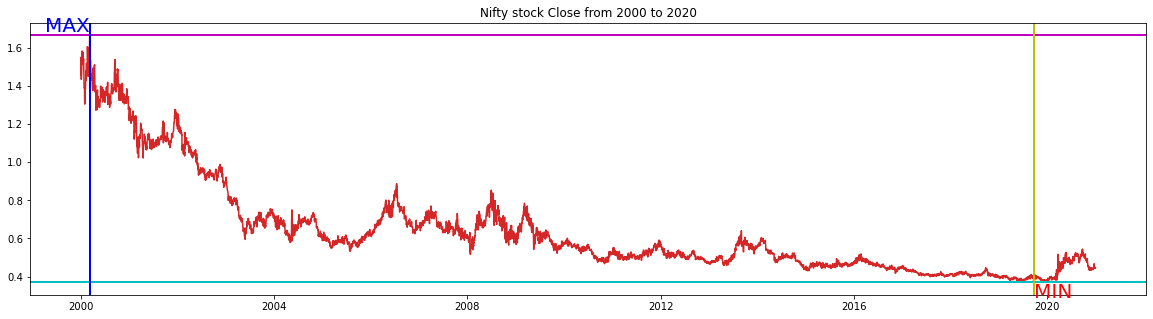

Max Value :   1.6664473417824028
Min Value :   0.3688453258828379


In [11]:
plot_attribute(nifty_50_df.shift(1)/nifty_bank_df,"Close",color='red')

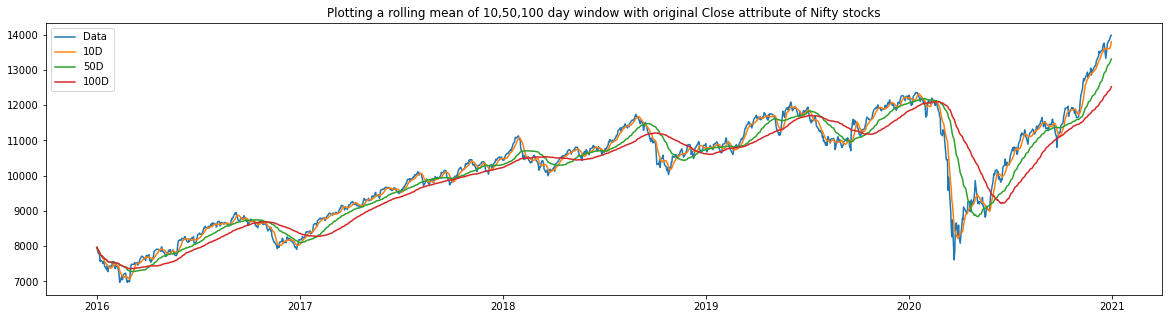

In [12]:
some_part_of_data = nifty_50_df['2016':'2020']

rolling_nifty_50_df_10 = some_part_of_data['Close'].rolling('10D').mean()
rolling_nifty_50_df_50 = some_part_of_data['Close'].rolling('50D').mean()
rolling_nifty_50_df_100 = some_part_of_data['Close'].rolling('100D').mean()

fig, ax = plt.subplots(1, figsize=(20,5))
ax.plot(some_part_of_data.index,some_part_of_data['Close'])
ax.plot(rolling_nifty_50_df_10.index, rolling_nifty_50_df_10)
ax.plot(rolling_nifty_50_df_50.index, rolling_nifty_50_df_50)
ax.plot(rolling_nifty_50_df_100.index, rolling_nifty_50_df_100)
ax.set_title("Plotting a rolling mean of 10,50,100 day window with original Close attribute of Nifty stocks")
plt.legend(['Data','10D','50D','100D'])
plt.show()

# Financial Charts<a id='13'></a>

## OHLC chart<a id='14'></a>

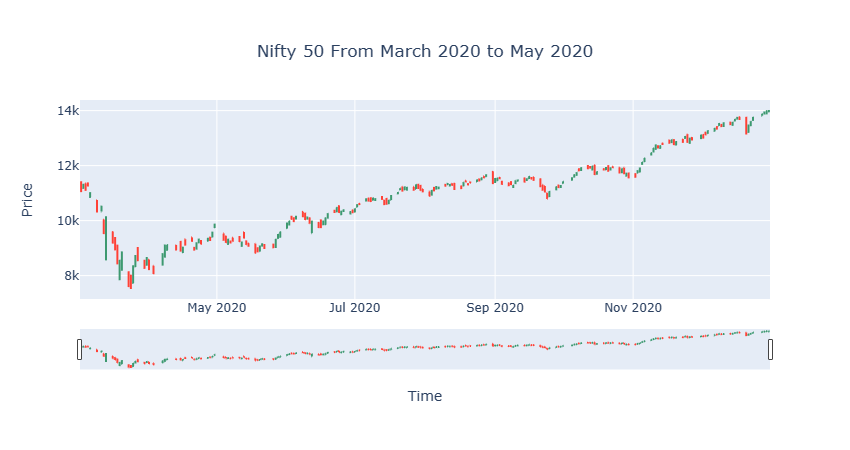

In [13]:
# Obtain data from the data frame
OHLC_data = nifty_50_df['3-2020':'2020']

fig = go.Figure(data=go.Ohlc(x=OHLC_data.index,
                            open=OHLC_data['Open'],
                            high=OHLC_data['High'],
                            low=OHLC_data['Low'],
                            close=OHLC_data['Close']))

fig.update_layout(title_text='Nifty 50 From March 2020 to May 2020',
                  title={
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                  xaxis_rangeslider_visible=True, 
                  xaxis_title="Time", 
                  yaxis_title="Price")

fig.show()

## Candlestick chart<a id='15'></a>

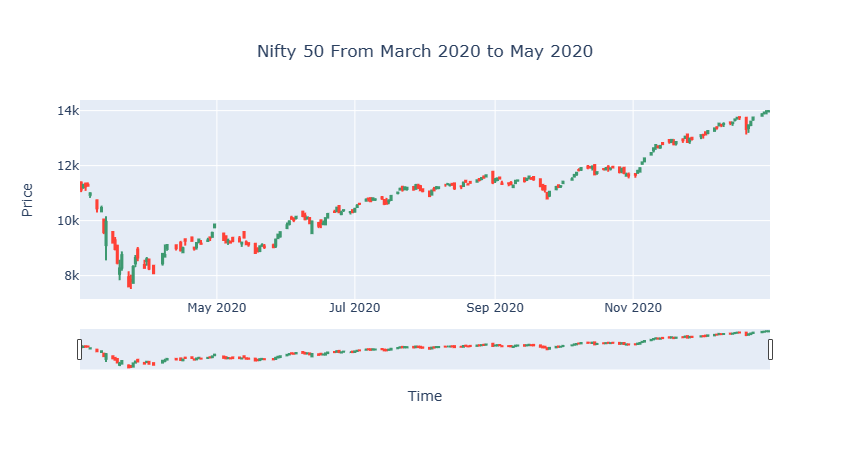

In [14]:
Candlestick_data = nifty_50_df['3-2020':'2020']

fig = go.Figure(data=go.Candlestick(x=Candlestick_data.index,
                            open=Candlestick_data['Open'],
                            high=Candlestick_data['High'],
                            low=Candlestick_data['Low'],
                            close=Candlestick_data['Close']))

fig.update_layout(title_text='Nifty 50 From March 2020 to May 2020',
                  title={
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                  xaxis_rangeslider_visible=True, 
                  xaxis_title="Time", 
                  yaxis_title="Price")

fig.show()

# Time series decomposition<a id='16'></a>

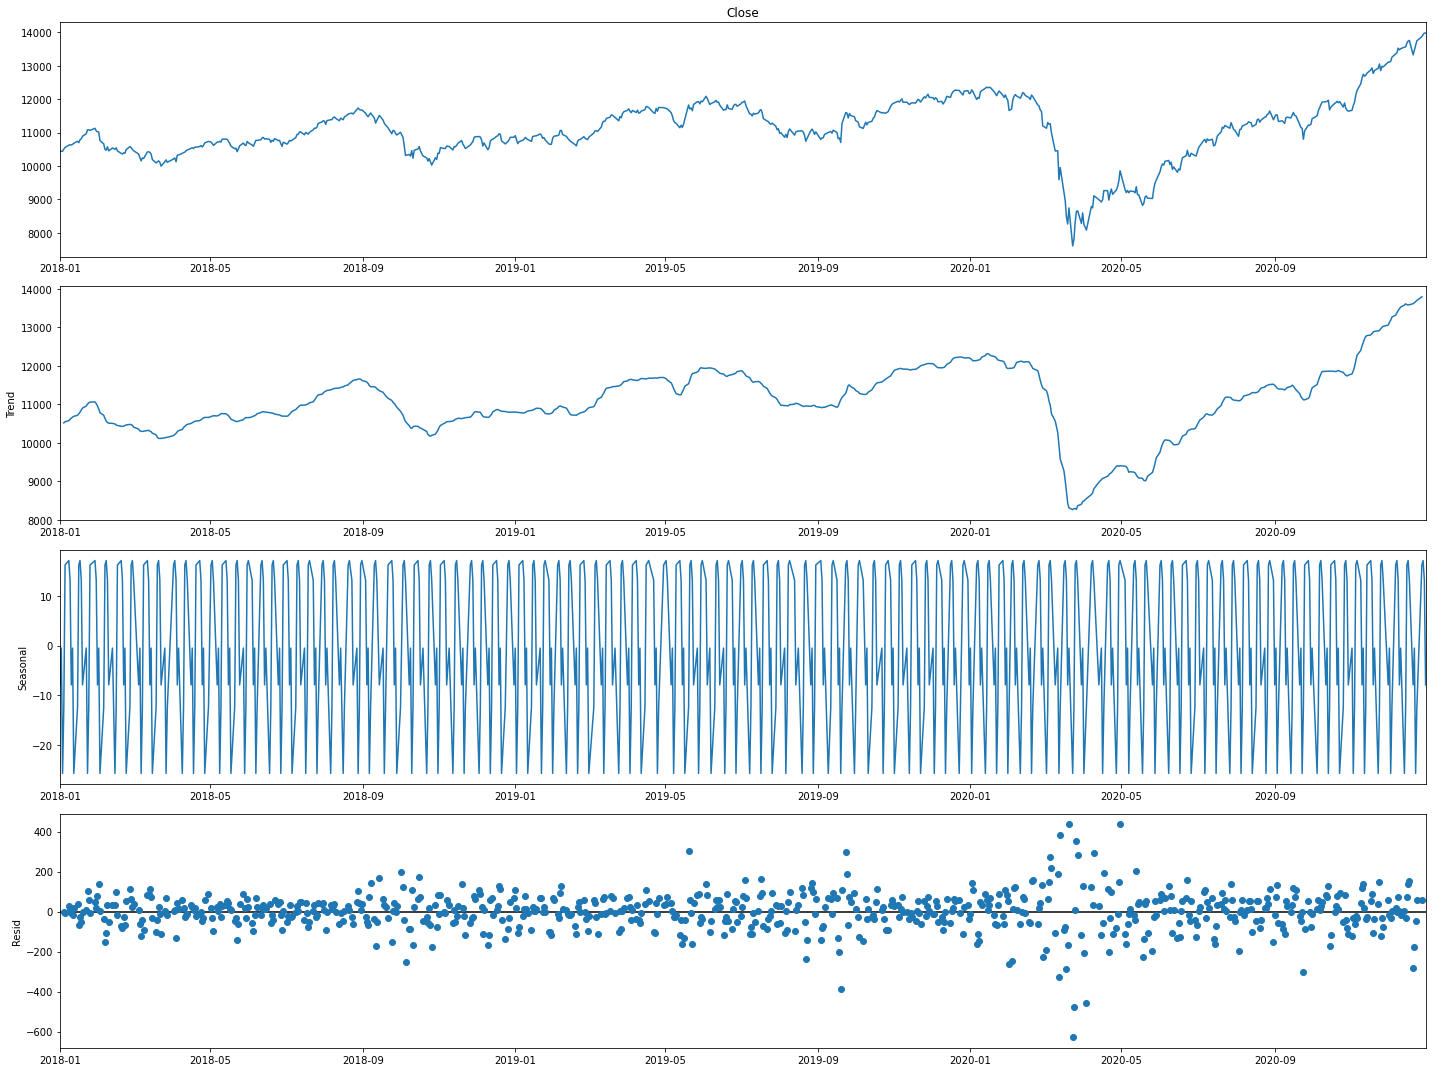

In [15]:
decomposition_data = nifty_50_df['2018':'2020']
decomp_results = seasonal_decompose(decomposition_data['Close'], freq=7)
plt.rcParams["figure.figsize"] = (20,15)
figure = decomp_results.plot()

plt.show()

# Autocorrelation and Partial Autocorrelation<a id='17'></a>

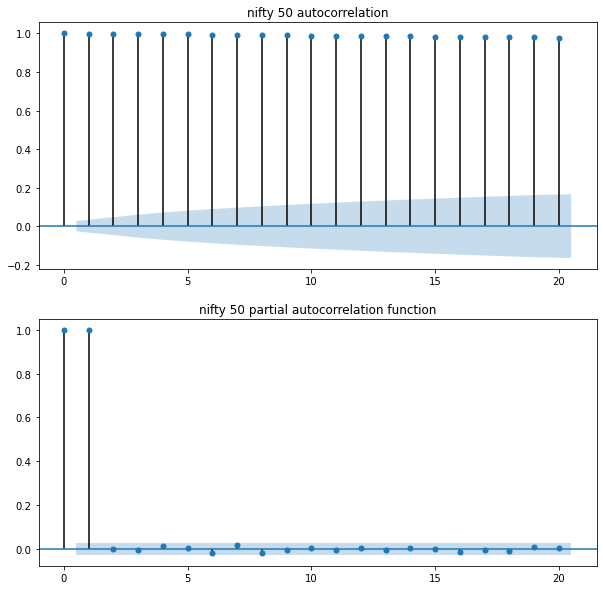

In [16]:
plt.figure(figsize=(10,10))

# ACF of Nifty 50 close price
ax1 = plt.subplot(211)
plot_acf(nifty_50_df["Close"], lags="20",title="nifty 50 autocorrelation",ax=ax1)

# PACF of Nifty 50 close price
ax2 = plt.subplot(212)
plot_pacf(nifty_50_df["Close"], lags="20",title="nifty 50 partial autocorrelation function",ax=ax2)

plt.show()

In [17]:
train_data = nifty_50_df["Close"]["2018":"4-15-2020"]
test_data =  nifty_50_df["Close"]["4-15-2020":]

In [18]:
order_aic_bic =[] 
# Loop over AR order 
for p in range(6): 
    # Loop over MA order 
    for q in range(3): 
        # Fit model 
        for d in range(2):
            model = SARIMAX(train_data, order=(p,d,q)) 
            results = model.fit() 
            # Add order and scores to list 
            order_aic_bic.append((p,d, q, results.aic, results.bic))

In [19]:
order_df = pd.DataFrame(order_aic_bic, columns=['p','d','q', 'aic', 'bic'])
#short value by aic and get value of p d q
order_df.sort_values('aic')[:5]

,p,d,q,aic,bic
35,5,1,2,7026.688218,7061.325986
23,3,1,2,7038.550556,7064.528882
33,5,1,1,7057.305357,7087.613403
28,4,0,2,7061.407522,7091.728035
34,5,0,2,7061.904953,7096.556968


## SARIMAXA Model<a id='19'></a>

In [20]:
model = SARIMAX(train_data, order=(5,1,2)) 
results = model.fit()

In [21]:
mae = np.mean(np.abs(results.resid))
print(mae)

102.14464274563288


## Model diagnostics<a id='20'></a>

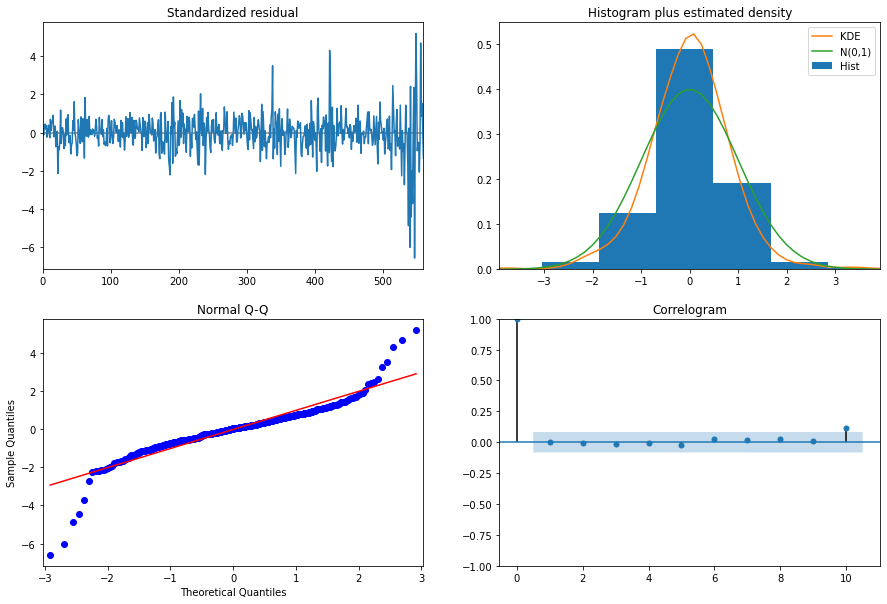

In [22]:
plt.rcParams["figure.figsize"] = (15,10)
results.plot_diagnostics() 
plt.show()

## Prediction on train data<a id='21'></a>

In [23]:
prediction = results.get_prediction(start="7-2019")

In [24]:
predictedmean = prediction.predicted_mean
p_bounds = prediction.conf_int()
p_lower_limit = p_bounds.iloc[:,0]
p_upper_limit = p_bounds.iloc[:,1]

## Forcasting on test data<a id='22'></a>

In [25]:
forecast = results.get_forecast(steps=len(test_data))

In [26]:
mean_forecast = forecast.predicted_mean
f_bounds = forecast.conf_int()
f_lower_limit = f_bounds.iloc[:,0]
f_upper_limit = f_bounds.iloc[:,1]

## Plot Prediction and Forcasting<a id='23'></a>

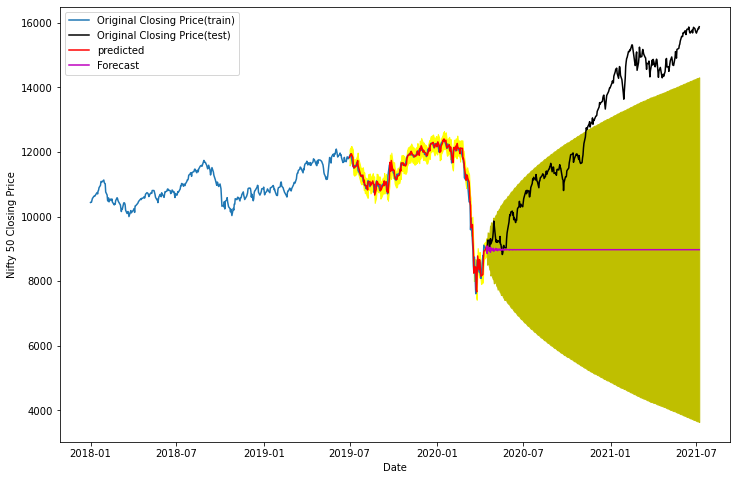

In [27]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data, label='Original Closing Price(train)')
plt.plot(test_data.index, test_data, label='Original Closing Price(test)',color='k')

plt.plot(predictedmean.index, predictedmean, color='r', label='predicted')
plt.plot(test_data.index, mean_forecast, color='m', label='Forecast')

plt.fill_between(predictedmean.index,p_lower_limit,p_upper_limit, color='yellow')
plt.fill_between(test_data.index,f_lower_limit,f_upper_limit, color='y')

plt.xlabel('Date')
plt.ylabel('Nifty 50 Closing Price')
plt.legend()
plt.show()

# LSTM

## Import Liberary<a id='24'></a>

In [28]:
import keras
import keras.backend as K
K.clear_session()
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


## Data Preprocessing<a id='25'></a>

In [29]:
X = nifty_50_df.drop(["Close","Turnover","P/E","P/B","Div Yield"],axis=1)
y = nifty_50_df["Close"]

# Preprocessing
scaler = MinMaxScaler()
scaler_X = scaler.fit_transform(X)

X_df = pd.DataFrame(data=scaler_X, columns=["Open","High","Low","Volume"],index= X.index)
y_df = pd.DataFrame(data=y, columns=["Close"],index= y.index)

train_X_df = X_df["2000":"1-2-2020"]
test_X_df = X_df["1-2-2020":]

train_y_df = y_df["2000":"1-2-2020"]
test_y_df = y_df["1-2-2020":]

train_X = np.array(train_X_df)
test_X = np.array(test_X_df)

train_y = np.array(train_y_df)
test_y = np.array(test_y_df)

train_X = np.reshape(train_X,(train_X.shape[0],train_X.shape[1],1))
test_X = np.reshape(test_X,(test_X.shape[0],test_X.shape[1],1))

train_y = np.reshape(train_y,(train_y.shape[0],1))
test_y = np.reshape(test_y,(test_y.shape[0],1))

In [30]:
print("Train X shape : ", train_X.shape)
print("Test X shape : ", test_X.shape)

print("Train y shape : ", train_y.shape)
print("Test y shape : ", test_y.shape)

Train X shape :  (4976, 4, 1)
Test X shape :  (378, 4, 1)
Train y shape :  (4976, 1)
Test y shape :  (378, 1)


## LSTM Model<a id='26'></a>

In [31]:
lstm_model = keras.models.Sequential()
lstm_model.add(keras.layers.LSTM(128,
                                 input_shape=(train_X.shape[1],1),
                                 activation='relu',
                                 return_sequences=True
                                ))

lstm_model.add(keras.layers.LSTM(64,return_sequences=False,activation='relu'))

lstm_model.add(keras.layers.Dense(32,activation='relu'))
lstm_model.add(keras.layers.Dense(1))

lstm_model.compile(loss='mean_squared_error', optimizer='adam')

## Model Training<a id='27'></a>

In [32]:
history = lstm_model.fit(train_X, train_y, batch_size=128,epochs=100, verbose=1, shuffle=False)

Epoch 1/100
4976/4976 [==============================] - 3s 518us/step - loss: 36548711.4019
Epoch 2/100
4976/4976 [==============================] - 1s 215us/step - loss: 34229271.7203
Epoch 3/100
4976/4976 [==============================] - 1s 219us/step - loss: 2053203.1156
Epoch 4/100
4976/4976 [==============================] - 1s 215us/step - loss: 3175203.6084
Epoch 5/100
4976/4976 [==============================] - 1s 201us/step - loss: 3120374.9373
Epoch 6/100
4976/4976 [==============================] - 1s 207us/step - loss: 2686269.6135
Epoch 7/100
4976/4976 [==============================] - 1s 201us/step - loss: 1964010.2385
Epoch 8/100
4976/4976 [==============================] - 1s 205us/step - loss: 1392687.5123
Epoch 9/100
4976/4976 [==============================] - 1s 212us/step - loss: 1067661.8889
Epoch 10/100
4976/4976 [==============================] - 1s 207us/step - loss: 906866.3230
Epoch 11/100
4976/4976 [==============================] - 1s 216us/step - loss

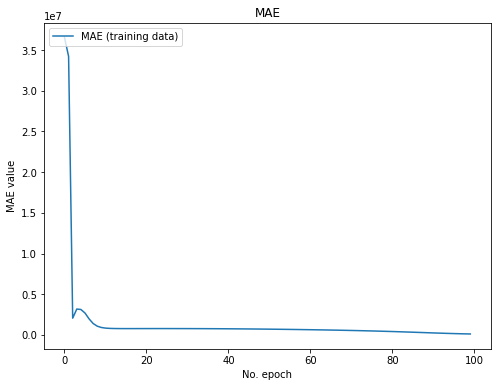

In [33]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='MAE (training data)')
plt.title('MAE')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

## Model Prediction<a id='28'></a>

In [34]:
prediction = lstm_model.predict(test_X)

## RMS Error of model<a id='29'></a>

In [35]:
np.sqrt(np.mean(((prediction - test_y) ** 2)))

288.80966059506414

## Plot Prediction<a id='30'></a>

In [36]:
import pickle

In [37]:
'''with open('stock_prediction','wb') as f:
    pickle.dump(lstm_model,f)
    '''

In [38]:
with open('stock_prediction','rb') as f:
    mod = pickle.load(f)

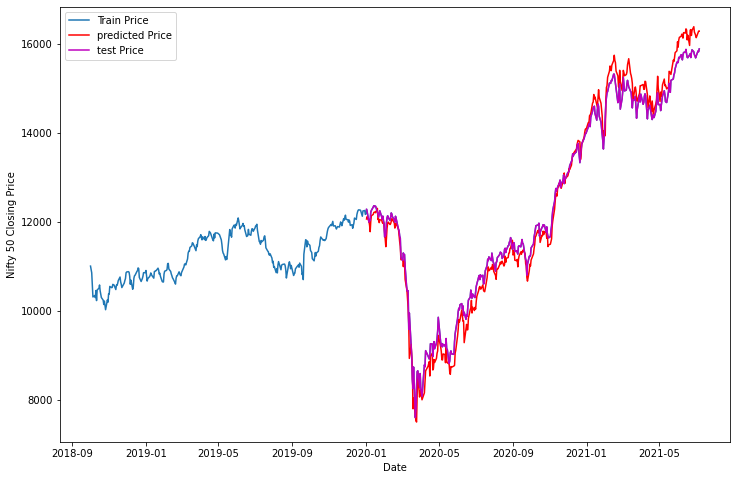

In [39]:
test_y_df["prediction"] = np.reshape(prediction,(prediction.shape[0]))

plt.figure(figsize=(12,8))

plt.plot(nifty_50_df["10-2018":].index,nifty_50_df["10-2018":]["Close"], label="Train Price")
plt.plot(test_y_df.index,test_y_df.prediction, label="predicted Price",color='r')
plt.plot(test_y_df.index,test_y_df.Close, label="test Price",color='m')

plt.xlabel('Date')
plt.ylabel('Nifty 50 Closing Price')
plt.legend()
plt.show()